In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from highlight_text import fig_text, ax_text

from PIL import Image
import urllib
import json
import os

plt.style.use('../../assets/stylesheets/soc_base.mplstyle')

In [138]:
df = pd.read_csv('../../data/epl_xg_2223.csv', index_col=0)
color = '#EF297C'
team_id = 8650


Text(10, 20, 'vs Arsenal')

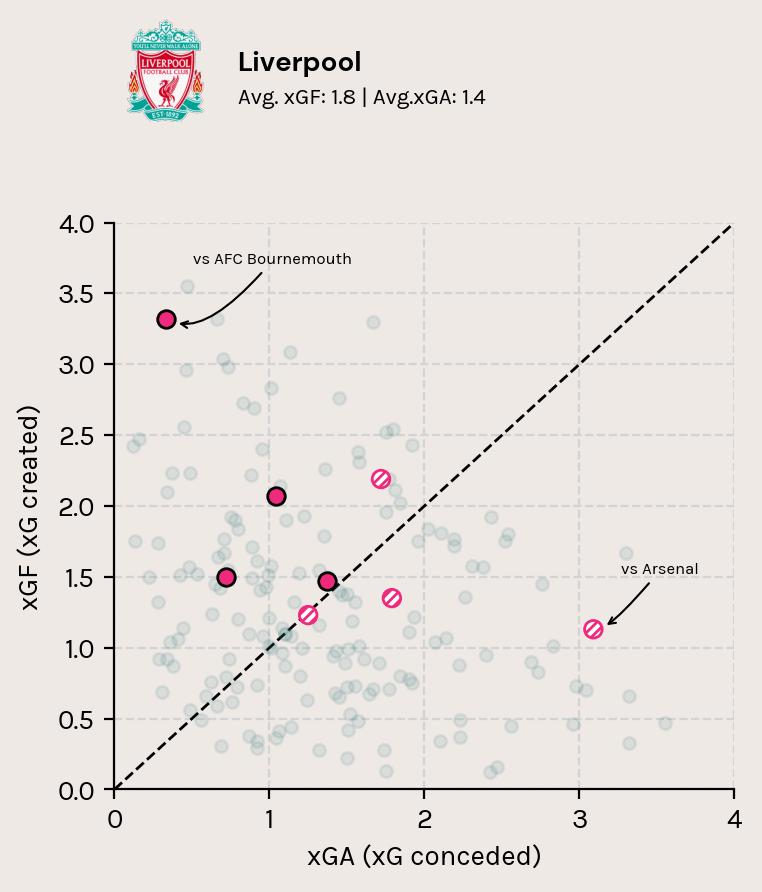

In [139]:
fig = plt.figure(figsize=(4, 5), dpi=200)
nrows = 2
ncols = 1
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig,
    height_ratios=[(1/nrows)*2.35 if x % 2 != 0 else (1/nrows)/2.35 for x in range(nrows)], hspace=.3
)

ax1 = plt.subplot(gspec[0, 0], anchor='NW')
ax2 = plt.subplot(gspec[1, 0])

ax2.grid(ls='--', color='lightgrey')

df_aux = df[df['team_id'] == team_id]
max_xGA = df_aux[df_aux['variable'] == 'xG_ag']['value'].max()
max_xGF = df_aux[df_aux['variable'] == 'xG_for']['value'].max()
match_id_max_xGF = df_aux[df_aux['value'] == max_xGF].iloc[0]['match_id']
match_id_max_xGA = df_aux[df_aux['value'] == max_xGA].iloc[0]['match_id']
match_max_xGF_df = df_aux[df_aux['match_id'] == match_id_max_xGF]
match_max_xGA_df = df_aux[df_aux['match_id'] == match_id_max_xGA]

max_xGF_opp = df[(df['match_id']==match_id_max_xGF)&(df['team_id']!=team_id)].iloc[0]['team_name']
max_xGA_opp = df[(df['match_id']==match_id_max_xGA)&(df['team_id']!=team_id)].iloc[0]['team_name']

df_aux_h = df[(df['team_id'] == team_id) & (df['venue'] == 'H')]
df_aux_a = df[(df['team_id'] == team_id) & (df['venue'] == 'A')]

ax2.scatter(
    df[df['variable'] == 'xG_ag']['value'],
    df[df['variable'] == 'xG_for']['value'],
    alpha=.1, lw=1, zorder=3,
    s=20
)
ax2.scatter(
    df_aux_h[df_aux_h['variable'] == 'xG_ag']['value'],
    df_aux_h[df_aux_h['variable'] == 'xG_for']['value'],
    alpha=1, lw=1, ec='black', fc=color,
    zorder=3, s=40
)
ax2.scatter(
    df_aux_a[df_aux_a['variable'] == 'xG_ag']['value'],
    df_aux_a[df_aux_a['variable'] == 'xG_for']['value'],
    alpha=1, lw=1, ec=color, fc='white',
    zorder=3, s=40, hatch='///////'
)

ax2.set_xlim(0, round(df['value'].max()+.5))
ax2.set_ylim(0, round(df['value'].max()+.5))

ax2.plot(
    [0, ax2.get_xlim()[1]],
    [0, ax2.get_ylim()[1]],
    ls='--', color='black', lw=1, zorder=2
)

ax2.set_xlabel('xGA (xG conceded)')
ax2.set_ylabel('xGF (xG created)')

team_name = df[df['team_id'] == team_id]['team_name'].iloc[0]
avg_xG_for = df[(df['team_id'] == team_id) & (
    df['variable'] == 'xG_for')]['value'].mean()
avg_xG_ag = df[(df['team_id'] == team_id) & (
    df['variable'] == 'xG_ag')]['value'].mean()
fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
club_icon = Image.open(urllib.request.urlopen(
    f'{fotmob_url}{team_id:.0f}.png'))
ax1.imshow(club_icon)
ax1.axis('off')

ax_text(
    x=1.2,
    y=.7,
    s=f'<{team_name}>\n<Avg. xGF: {avg_xG_for:.1f} | Avg.xGA: {avg_xG_ag:.1f}>',
    ax=ax1,
    highlight_textprops=[{'weight': 'bold', 'font': 'DM Sans'}, {'size': '8'}],
    font='Karla',
    ha='left',
    size=10,
    annotationbbox_kw={'xycoords': 'axes fraction'}
)

ax2.annotate(
    xy=(match_max_xGF_df[match_max_xGF_df['variable'] == 'xG_ag']['value'],
        match_max_xGF_df[match_max_xGF_df['variable'] == 'xG_for']['value']),
    xytext=(10, 20),
    textcoords="offset points",
    text=f"vs {max_xGF_opp}",
    size=6,
    color="black",
    arrowprops=dict(
        arrowstyle="->",
        shrinkA=0,
        shrinkB=5,
        color="black",
        linewidth=.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    )
)

ax2.annotate(
    xy=(match_max_xGA_df[match_max_xGA_df['variable'] == 'xG_ag']['value'],
        match_max_xGA_df[match_max_xGA_df['variable'] == 'xG_for']['value']),
    xytext=(10, 20),
    textcoords="offset points",
    text=f"vs {max_xGA_opp}",
    size=6,
    color="black",
    arrowprops=dict(
        arrowstyle="->",
        shrinkA=0,
        shrinkB=5,
        color="black",
        linewidth=.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    )
)
